In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

# 2 Feature Engineering

## 2.1 Standardization

### 2.1.1 StandardScalar()
- Application: StandardScalar is applied to data columns and hence only one feature
- Description: StandardScalar standardizes features individually by removing the mean and scaling to unit variance ($ z = \frac{x - \mu}{\sigma} $). Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity

In [23]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [24]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.describe())

# initiate StandardScaler()
scaler = StandardScaler()

# fit scaler and transform iris data
iris_standard_scaler = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_standard_scaler, columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.057333       3.758000      1.199333
std         0.828066      0.435866       1.765298      0.762238
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -1.690315e-15 -1.842970e-15  -1.698641e-15 -1.409243e-15
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.433947e+00  -1.567576e+00 -1.447076e+00
25%    -9.006812e-01 -5.923730e-01  -1.226552e+00 -1.183812e+00
50%    -5.250608e-02 -1.319795e-01   3.3

### 2.1.2 Normalizer()
- Application: Normalizer is applied to data rows and hence across features
- Description: Normalizer rescales each row, meaning that it adjusts the value of each feature relative to the value of the other features in each row to a realative scale; this preserves the dispersion ($n = \frac{x-x_{min}}{x_{max}-x_{min}}$)

In [25]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer

In [26]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.head())

# initiate StandardScaler()
scaler = Normalizer()

# fit scaler and transform iris data
iris_normlized = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_normlized,  columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.803773      0.551609       0.220644      0.031521
1       0.828133      0.507020       0.236609      0.033801
2       0.805333      0.548312       0.222752      0.034269
3       0.800030      0.539151       0.260879      0.034784
4       0.790965      0.569495       0.221470      0.031639


## 2.2 Variance

### 2.2.1 VarianceThreshold()
- Application: VarianceThreshold() is applied for feature selection and identifies low variance features that won't be significant in predicting the target variable
- Description: VarianceThreshold() is a feature selector that removes all low-variance features

In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
# create data frame
x = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
df = pd.DataFrame(x, columns = ["a", "b", "c", "d"])

# initialize VarianceThreshold
selector = VarianceThreshold()

# fit model and transform data frame
df_new = selector.fit_transform(df)

# print results
print("These are the infos on the original data frame:", "\n", df.describe())
print("This is how the transformed data frame looks like:", "\n", 
      pd.DataFrame(df_new, columns = df.columns[selector.get_support()]))

These are the infos on the original data frame: 
          a         b         c    d
count  3.0  3.000000  3.000000  3.0
mean   0.0  1.333333  1.666667  3.0
std    0.0  0.577350  2.081666  0.0
min    0.0  1.000000  0.000000  3.0
25%    0.0  1.000000  0.500000  3.0
50%    0.0  1.000000  1.000000  3.0
75%    0.0  1.500000  2.500000  3.0
max    0.0  2.000000  4.000000  3.0
This is how the transformed data frame looks like: 
    b  c
0  2  0
1  1  4
2  1  1


## 2.3 Correlation

### 2.3.1 Correlation Matrix
- Application: Correlation matrix is applied for feature selection and identifies highly correlated features that should be removed
- Description: Find the correlation matrix and remove features that are highly correlated

In [ ]:
from sklearn.datasets import load_iris

In [22]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# run correlation matrix
iris.corr(method = "pearson")[(iris.corr(method = "pearson") > 0.9) & (iris.corr(method = "pearson") != 1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,NaN,NaN,NaN,NaN
SepalWidthCm,NaN,NaN,NaN,NaN
PetalLengthCm,NaN,NaN,NaN,0.962865
PetalWidthCm,NaN,NaN,0.962865,NaN


## 2.4 Text

### 2.4.1 TfidfVectorizer()
- Application: TfidfVectorizer is applied to convert text (documents) into numerical values, namely a matrix of tf-idf features
- Description: 
    * Tf–idf is short for term frequency–inverse document frequency and represents a numerical statistic that is intended to reflect how important a word is to a document
    * The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, helping to adjust for the fact that some words appear more frequently in general

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.get_feature_names())
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 ['cats', 'chase', 'dogs', 'greet', 'say', 'to', 'woof']
The resulting matrix looks like this: 
 [[0.83559154 0.         0.         0.54935123 0.         0.
  0.        ]
 [0.         0.         0.65985664 0.         0.43381609 0.43381609
  0.43381609]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.
  0.        ]]


### 2.4.2 CountVectorizer()
- Application: CountVectorizer is applied to count the number of times a word appears in a document
- Description:
    * Returns a vector with a length of the entire vocabulary of the document and an integer count for the number of times each word (token) appeared in the document
    * The output is presented as a sparse matrix

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize the CountVectorizer
vectorizer = CountVectorizer()

# fit the vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.vocabulary_)
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 {'cats': 0, 'greet': 3, 'dogs': 2, 'say': 4, 'woof': 6, 'to': 5, 'chase': 1}
The resulting matrix looks like this: 
 [[2 0 0 1 0 0 0]
 [0 0 2 0 1 1 1]
 [1 1 1 0 0 0 0]]


### 2.4.3 Keyword Extraction
- Application: Keyword extraction is used for text mining, information retrieval, and natrual language processing
- Description:
    * Keyword extraction automatically identifies terms that best describe the subject of a document
    * It determines key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text

In [64]:
from rake_nltk import Rake

In [88]:
# load data
movies = pd.read_csv('datasets/Movies.csv', index_col = 0)
movies_plot = movies.loc[:, ['Title', 'Plot']]

# extracting keywords from plots
movies_plot['Keywords'] = ''
for index, row in movies_plot.iterrows():
    plot = row['Plot']
    # instantiating Rake, by default it uses english stopwords from nltk and discards puntuation
    r = Rake()
    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)
    # getting the dictionary whith key words as keys and their scores as values
    keywords_dict_scores = r.get_word_degrees()
    # assigning the key words to the new column for the corresponding movie
    row['Keywords'] = list(keywords_dict_scores.keys())

# print one example
print('The keywords from the plot of the movie The Dark Knight are:', list(movies_plot[movies_plot['Title'] == 'The Dark Knight']['Keywords']))

The keywords from the plot of the movie The Dark Knight are: [['mysterious', 'past', 'people', 'menace', 'known', 'chaos', 'gotham', 'ability', 'wreaks', 'havoc', 'dark', 'knight', 'must', 'accept', 'one', 'physical', 'tests', 'joker', 'emerges', 'greatest', 'psychological', 'fight', 'injustice']]


### 2.4.4 Word Embeddings
- Application: Word embeddings are used to capture context of a word in a document and are hence applied for sentiment analysis
- Description:
    * Word embeddings are word representations (words are mapped to vectors of real numbers) that allow words with similar meaning to have a similar representation
    * There are several algorithms to perform this task, for example Word2Vec, which again consists of two learning models:
        * Continuous Bag-of-Words (CBOW): Learns the embedding by predicting the current word based on its context
        * Continuous Skip-Gram-Model: Learns by predicting the surrounding words given a current word
    * Pre-trained embeddings allow one to identify words in a document that are related to a given input word

In [142]:
# import gensim

# initialize model
#model_gn = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# define keys to create embeddings for
#keys = ['love', 'hate', 'stocks']

# create embeddings
#embedding_clusters = []
#word_clusters = []
#for word in keys:
#    embeddings = []
#    words = []
#    for similar_word, _ in model_gn.most_similar(word, topn=30):
#        words.append(similar_word)
#        embeddings.append(model_gn[similar_word])
#    embedding_clusters.append(embeddings)
#    word_clusters.append(words)

## 2.5 Oversampling

### 2.5.1 Synthetic Minority Oversampling Technique
- Application: Synthetic Minority Oversampling Technique (SMOTE) is used to adjust the distribution of classes in a dataset if we have imbalanced data that needs to be classified
- Description:
    * We differentiate between undersampling, where we have to reduce the number of majority cases, and oversampling, where we have to increase the number of minority cases
    * SMOTE is applied to oversample the minority class
    * We randomly select a minority point, find the k-nearest neighbors for the point (typically $k=5$) and add synthetic points between the chosen point and one randomly selected neighbor

In [12]:
from imblearn.over_sampling import SMOTE

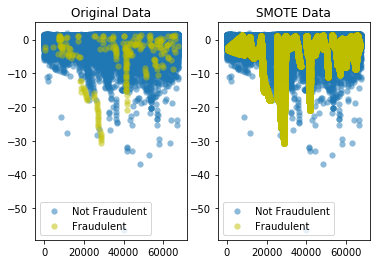

In [11]:
# load data
credit = pd.read_csv('datasets/Credit.csv',index_col=0)
y = credit.iloc[:,-1].values
x = credit.iloc[:, :-1].values

# initialize method
method = SMOTE()

# create resampled feature set
x_resampled, y_resampled = method.fit_sample(x, y)

# plot cases along first two features
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x[y == 0, 0], x[y == 0, 1], label="Not Fraudulent", alpha=0.5, linewidth=0.15)
ax1.scatter(x[y == 1, 0], x[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='y')
ax1.legend()
ax1.set_title('Original Data')
ax2.scatter(x_resampled[y_resampled == 0, 0], x_resampled[y_resampled == 0, 1], label="Not Fraudulent", alpha=0.5, linewidth=0.15)
ax2.scatter(x_resampled[y_resampled == 1, 0], x_resampled[y_resampled == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='y')
ax2.legend()
ax2.set_title('SMOTE Data')
plt.show()

## 2.6 Dimension Reduction

### 2.6.1 Principle Component Analysis
- Application: PCA is applied to reduce the dimensionality of data and to find patterns in data of high dimension
- Desciption: PCA represents the original data in a smaller number of components. The number of components should be reduced as much as possible, while still describing >85% of the data's variance
- Functionality:
    * Standardize the features, otherwise variables with relatively higher variance outweigh other features
    * We have a point cloud and want to find its major/minor direction
    * This point cloud is centered at $\mu$, but we want to re-center it at the origin (subtract the column means)
    * We then rotate the matrix to be more axis-aligned by multiplying it with an orthogonal matrix and make the columns orthonormal; mathematically, the columns of our matrix are now uncorrelated, meaning that the resulting components will also be uncorrelated
    * We then perform matrix singular value decomposition on the above described matrix into eigenvectors and eigenvalues (this can also be performed on the covariance matrix between columns)
    * The eigenvalues represent the variance described by the corresponding eigenvector
    * We now sort the eigenvalues in descending order in order to select as many eigenvector necessary to describe our original data well enough
    * The eigenvectors can be used to represent the loadings:
        * They can be thought of as the directions in the feature space along which the data vary the most
        * They can be used to determine the contribution of each feature to each of the component
        * The resulting vectors fit the data, minimizing the distance between each observation and the vector
    * The principal component scores are derived multiplying the loadings by the feature values
    * Biplot are used to displays the principle component scores as well as the principle component loadings
- Limitations: PCA assumes linear relationships between data points and is usually just a pre-processing step

In [123]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [176]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# fit pca without specifying n_components
pca = PCA().fit(iris)

# find optimal number of components
print('The cummulative explained variance by each component is:', np.cumsum(pca.explained_variance_ratio_))

# fit pca with n_components = 1
pca = PCA(n_components = 1).fit(iris)

# reduce dimensionality of iris
iris_reduced = pca.fit_transform(iris)

# transform data back to its original shape
iris_inverse = pca.inverse_transform(iris_reduced)
print(pd.DataFrame({'pca_inverse': iris_inverse[0], 'original': iris.values[1]}))

# print new data
print('The shape of the iris_reduced is:', iris_reduced.shape)

The cummulative explained variance by each component is: [0.92461872 0.97768521 0.99478782 1.        ]
   pca_inverse  original
0     4.873326       4.9
1     3.284202       3.0
2     1.458588       1.4
3     0.237640       0.2
The shape of the iris_reduced is: (150, 1)


### 2.6.2 Truncated Singular Value Decomposition
- Application: Truncated Singular Value Decomposition (SVD) is applied for text mining. It reduces dimensions of text data and is a pre-preparation tool for the clustering of text data
- Description: Contrary to PCA, Truncated SVD does not center the data before computing the singular value decomposition, meaning that it can work with sparse matrices efficiently
- Functionality:
    * We first have to transform text into features with numerical values: There are several techniques such as CountVectorizer or TfidfVectorizer
    * We then perform SVD on the numerical matrix like we do in PCA
    * Only the column and row vectors corresponding to the largest eigenvalues are calculated and the rest of the matrix is discarded
- Limitations: Text data needs to be vectorized before Truncated SVD can be applied to it. Truncated SVD is usually just a pre-processing setp

In [20]:
from scipy.sparse import random as sparse_random
from sklearn.decomposition import TruncatedSVD

In [33]:
# load random sparse matrix (i.e. representing tf-idf matrix)
x = sparse_random(100, 100, density = 0.1, random_state = 42)

# initialize and fit svd
svd = TruncatedSVD(n_components = 42).fit(x)

# find optimal number of components
print('The cummulative explained variance by each component is:', np.cumsum(svd.explained_variance_ratio_))

# transform data
x_svd = svd.fit_transform(x)

# print results
print(pd.DataFrame(x_svd[:1]))

The cummulative explained variance by each component is: [0.01342521 0.05961285 0.10155722 0.13995647 0.17480073 0.20896208
 0.24148441 0.27200877 0.30147327 0.33037641 0.35709628 0.38327579
 0.40810268 0.43237488 0.4558951  0.47848363 0.50058471 0.52205071
 0.54178362 0.56130295 0.57953759 0.59744854 0.61443092 0.63087268
 0.64704028 0.66271213 0.67809192 0.69276143 0.707133   0.72123466
 0.73478017 0.74729161 0.75945563 0.7715399  0.78292753 0.79406602
 0.80469552 0.81498795 0.82436963 0.83366938 0.84273691 0.85121777]
         0         1         2         3         4         5         6   \
0  0.934004  1.115706  0.300979  0.590796  0.551706  0.065915 -0.033311   

        7         8         9   ...        32        33        34        35  \
0 -0.70139  0.491412  0.203077  ... -0.010019 -0.135218  0.150626 -0.008025   

         36        37        38        39        40        41  
0 -0.234909  0.013812 -0.185425 -0.119091  0.135215 -0.133744  

[1 rows x 42 columns]
